In [85]:
import math
import ezdxf
import shapely
from ezdxf.entities import *
from shapely.geometry import *
import matplotlib.pyplot as plt

In [86]:
drawing = ezdxf.readfile(r"datasets/lw.dxf")

In [87]:
msp = drawing.modelspace()

In [88]:
g = msp.groupby(key=lambda e: e.dxf.layer)

LINESTRING (1974.908148091645 4521.611685978171, 7634.775537952328 3974.311193573156)
delta =  -9745795.565800902
[(7634.775537952328, 3974.3111935731563), (7471.832338247464, 3975.601841258328), (7311.206449383346, 3948.1887799896795), (7157.914515061135, 3892.9281703906036), (7016.744126012277, 3811.545903542718), (6892.1042946819025, 3706.583698214122), (6787.887753612561, 3581.3197182795493), (6707.349378204535, 3439.6661895972666), (6653.004530934877, 3286.0472139570675), (6626.550501933305, 3125.2605961958543), (6628.8134994710945, 2962.3279998756257), (6659.722845948118, 2802.338111439294), (6718.313185285056, 2650.2877111179237), (6802.754632779871, 2510.9256142390136), (6910.40992579273, 2388.6043569375033), (7037.916790337733, 2287.144258399168)]
LINESTRING (7037.916790337733 2287.144258399168, 5136.201350389036 2542.276824318254)
delta =  -8586036.919461774
[(5136.201350389036, 2542.2768243182536), (5098.090852830138, 2405.2974934384724), (5036.151043161897, 2277.31621710977

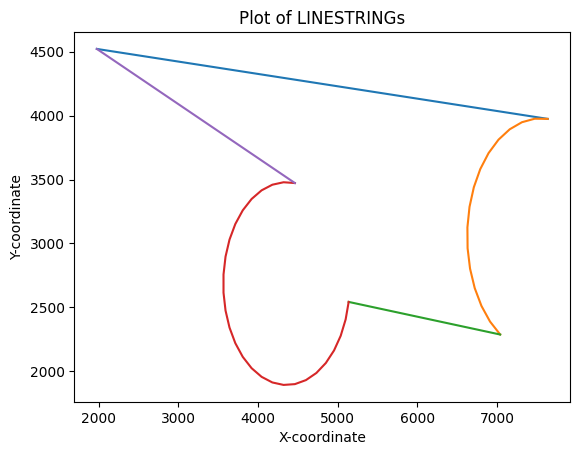

In [89]:
def func(start_point, end_point, bulge):
    theta = 4 * math.atan(abs(bulge))
    half_theta = theta / 2
    direction = -1 if bulge < 0 else 1
    dx = end_point[0] - start_point[0]
    dy = end_point[1] - start_point[1]
    distance = math.sqrt(dx * dx + dy * dy)
    half_distance = distance / 2.0
    radius = half_distance / math.sin(half_theta)
    mid_point = ((start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2)
    mid_center_dis = math.sqrt(abs(radius ** 2 - half_distance ** 2))

    # 计算斜率
    k0 = dy / dx
    k = -1 / k0

    # y = k1(x - mid_point[0]) + mid_point[1]
    L = mid_center_dis
    m1, m2 = mid_point

    delta = L ** 2 * k ** 2 + L ** 2 - m2 ** 2

    print("delta = ", delta)

    center_x = mid_point[0] + direction * mid_center_dis * dy / distance
    center_y = mid_point[1] - direction * mid_center_dis * dx / distance

    start_angle = math.atan2(start_point[1] - center_y, start_point[0] - center_x)
    end_angle = math.atan2(end_point[1] - center_y, end_point[0] - center_x)

    if start_angle < end_angle:
        start_angle += 2 * math.pi
    elif start_angle > end_angle:
        end_angle += 2 * math.pi

    arc_points = []
    num_segments = max(int(abs(end_angle - start_angle) / (math.pi / 18)), 3)
    for i in range(num_segments + 1):
        theta = start_angle + i * (end_angle - start_angle) / num_segments
        x = center_x + radius * math.cos(theta)
        y = center_y + radius * math.sin(theta)
        arc_points.append((x, y))
    return arc_points


result = []
for i, layer in enumerate(g.keys()):
    entities = g[layer]
    for j, entity in enumerate(entities):
        if isinstance(entity, LWPolyline):
            lw_data = [(x[0], x[1], x[4]) for x in entity.lwpoints]
            # print(lw_data)
            for k in range(len(lw_data) - 1):
                start_point, end_point = lw_data[k][:2], lw_data[k + 1][:2]
                bulge = lw_data[k][2]
                if bulge == 0:
                    ls = LineString([start_point, end_point])
                    print(ls)
                    result.append(ls)
                else:
                    res = func(start_point, end_point, bulge)
                    ls = LineString(res)
                    print(res)
                    result.append(ls)

# Initialize a plot
fig, ax = plt.subplots()

# Parse and plot each LINESTRING
for line_string in result:
    x, y = line_string.xy
    ax.plot(x, y)

# Set axis labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_title('Plot of LINESTRINGs')

# Show the plot
plt.show()

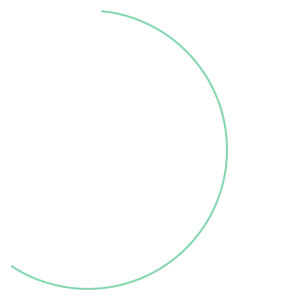

In [92]:
from shapely import wkt
wkt.loads("LINESTRING (7634.775537952327 3974.3111935731467, 7668.013939868969 3970.4872302284402, 7701.091724008173 3965.459879626563, 7733.965336660333 3959.235761309117, 7766.5914929496275 3951.8230706086724, 7798.927233827453 3943.231567857929, 7830.929982636859 3933.4725655382263, 7862.5576011734765 3922.558913384337, 7893.768445169137 3910.504981465145, 7924.521419125115 3897.326641262494, 7954.776030422818 3883.0412447731132, 7984.492442640645 3867.6676016611473, 8013.631528006834 3851.2259544913577, 8042.154918919227 3833.737952075624, 8070.025058464113 3815.2266209678273, 8097.205249867633 3795.7163351446534, 8123.659704814633 3775.2327839122363, 8149.353590571349 3753.8029380809025, 8174.253075849865 3731.4550144525465, 8198.325375353968 3708.2184386674044, 8221.538792947738 3684.1238064591475, 8243.862763390029 3659.202843369297, 8265.2678925799 3633.4883629740257, 8285.725996260004 3607.0142236783267, 8305.210137126951 3579.815284134462, 8323.694660299827 3551.927357343369, 8341.155227100104 3523.3871634994766, 8357.568847098537 3494.2322816410133, 8372.913908386785 3464.50110016947, 8387.170206033936 3434.23276630337, 8400.318968690464 3403.467134532899, 8412.342883304562 3372.2447141432694, 8423.226117918348 3340.6066158759077, 8432.954342513887 3308.5944977977074, 8441.514747881614 3276.2505104496067, 8448.896062486296 3243.617241346732, 8455.088567308316 3210.737658903168, 8460.084108640778 3177.6550558551976, 8463.876108825529 3144.412992257509, 8466.459574914004 3111.0552381274183, 8467.831105241468 3077.6257158126323, 8467.988893906013 3044.168442158444, 8466.932733146388 3010.7274705504938, 8464.664013615573 2977.346832909424, 8461.185722549691 2944.0704817137944, 8456.502439834696 2910.9422321275974, 8450.620331976012 2878.005704308583, 8443.547143979064 2845.3042659733396, 8435.292189151376 2812.8809752947745, 8425.866336839694 2780.778524207166, 8415.28199811825 2749.0391821934504, 8403.553109447024 2717.7047406287447, 8390.69511432154 2686.8164577534067, 8376.72494293831 2656.415004348066, 8361.660989902759 2626.540410182176, 8345.523090008935 2597.232011306584, 8328.332492122923 2568.5283982595233, 8310.111831204342 2540.4673652542338, 8290.885098502757 2513.0858604150962, 8270.677609968268 2486.4199371278287, 8249.515972917854 2460.504706567782, 8227.428051001352 2435.3742914688532, 8204.442927513246 2411.061781193886, 8180.590867098511 2387.599188165712, 8155.903275902986 2365.017405716211, 8130.412660220722 2343.3461674088835, 8104.152583692749 2322.614007888492, 8077.157623113648 2302.8482253093316, 8049.463322904071 2284.074845391593, 8021.10614830921 2266.318587153145, 7992.123437384788 2249.6028303618614, 7962.553351833834 2233.9495847513444, 7932.434826758941 2219.379461040583, 7901.807519396192 2205.9116437956986, 7870.711756898252 2193.5638661695166, 7839.188483235371 2182.352386552221, 7807.279205284221 2172.29196716384, 7775.0259381755495 2163.3958546167414, 7742.471149972621 2155.6757624737456, 7709.657705753263 2149.1418558248088, 7676.628811169179 2143.8027379025884, 7643.427955556812 2139.6654387545186, 7610.098854674683 2136.735405986306, 7576.685393142604 2135.016497589035, 7543.231566658542 2134.51097685933, 7509.781424069229 2135.2195094192584, 7476.379009370789 2137.141162339902, 7443.068303715762 2140.273405369751, 7409.893167502856 2144.6121142663, 7376.89728262571 2150.1515762264626, 7344.124094956697 2156.884497408652, 7311.616757141486 2164.8020125366224, 7279.418071779707 2173.8936965724342, 7247.570435066519 2184.1475784431564, 7216.115780969299 2195.5501568032514, 7185.095526012938 2208.086417811873, 7154.55051474647 2221.739854901677, 7124.520965962813 2236.492490513116, 7095.046419742455 2252.324899765593, 7066.165685390801 2269.216236034316, 7037.916790337734 2287.1442583991698)")